In [5]:
import subprocess
import sys

# List of required packages
required_packages = [
    "pandas", "numpy", "matplotlib", "gym", "gymnasium", "stable_baselines3", "shimmy"
]

def install_package(package):
    """Installs a package using pip if it's not already installed."""
    try:
        __import__(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check and install missing packages
for package in required_packages:
    install_package(package)


pandas is already installed.
numpy is already installed.
matplotlib is already installed.
gym is already installed.
gymnasium is already installed.
stable_baselines3 is already installed.
Installing shimmy...



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


## Implementing Reinforcement Learning for the Free Kick Scenario

In this section, we integrate a Reinforcement Learning (RL) model into our football simulation environment to enhance the decision-making of players during a free kick scenario. The goal is to train an agent that can effectively navigate the complexities of football tactics, such as dribbling, passing, shooting, and defending.

Reinforcement learning allows to simulate intelligent agents that can learn optimal strategies through trial and error. By interacting with the environment, the agent will receive rewards or penalties based on its actions, enabling it to improve over time. The advantage of RL is that the agent can learn autonomously without explicit programming of every action, which is essential for simulating the dynamic and evolving nature of football matches.

In our case:
- **Attackers** can move, pass the ball, shoot, or dribble, depending on their possession of the ball.
- **Defenders** are focused on positioning and moving to block the ball or intercept passes.
- **The Free Kick** starts with the kicker deciding whether to pass or shoot, and after the first step, all players can perform any action available.

### Using PPO for Training

For this problem, we use the **Proximal Policy Optimization (PPO)** algorithm from **Stable-Baselines3**. PPO is an on-policy RL algorithm that performs well in environments with discrete action spaces, making it suitable for our football simulation.

The model will be trained using the following process:
1. **Training**: The agent interacts with the environment, taking actions based on its current policy and receiving feedback in the form of rewards.
2. **Evaluation**: After training, we test the agent to observe how well it performs, ensuring that it has learned to make effective decisions in the context of a free kick.

In the code below:
- The environment (`FreeKickEnv`) is set up to allow players to perform actions like dribbling, passing, or shooting.
- A PPO agent is initialized and trained to interact with this environment, learning from its actions and the rewards received.
- During testing, the agent's actions and the environment's state (including player positions and ball movement) are visualized.

Now, let's look at the complete implementation of the RL training and testing loop.

In [6]:
from freeKickEnv import FreeKickEnv
from drawPitch import draw_pitch
import matplotlib.pyplot as plt  # type: ignore
import time
import random
from IPython.display import display, clear_output #type: ignore
from utils import to_field, ACTION_NAMES
from stable_baselines3 import PPO

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Training the model...
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.7     |
|    ep_rew_mean     | 20.7     |
| time/              |          |
|    fps             | 3467     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25.2        |
|    ep_rew_mean          | 25.2        |
| time/                   |             |
|    fps                  | 2123        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008360265 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         

ValueError: You have passed a tuple to the predict() function instead of a Numpy array or a Dict. You are probably mixing Gym API with SB3 VecEnv API: `obs, info = env.reset()` (Gym) vs `obs = vec_env.reset()` (SB3 VecEnv). See related issue https://github.com/DLR-RM/stable-baselines3/issues/1694 and documentation for more information: https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html#vecenv-api-vs-gym-api

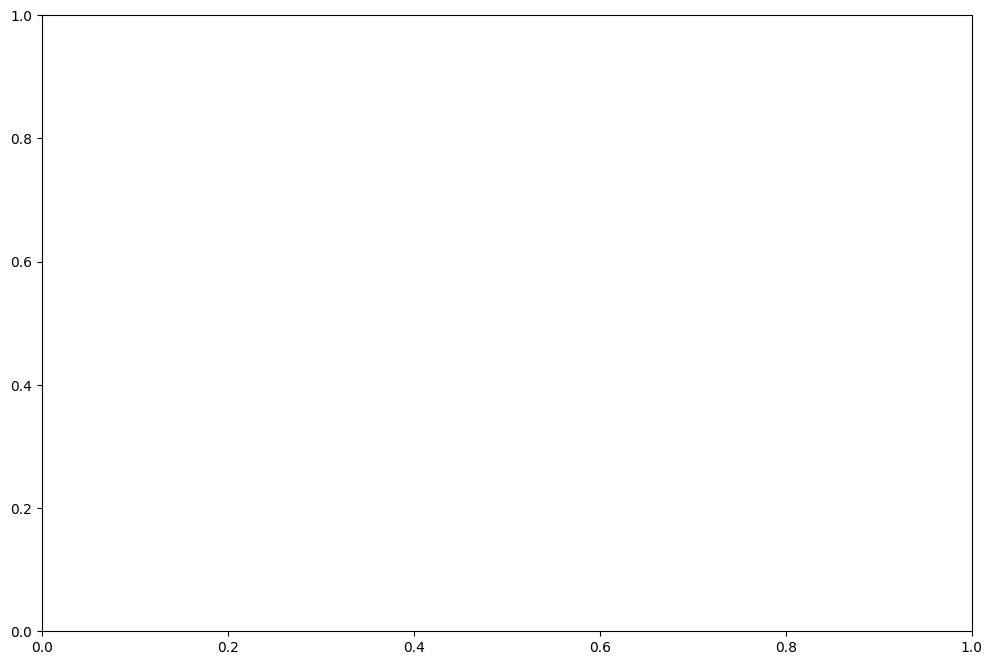

In [8]:
import gym
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Step 1: Create the environment
env = gym.make("CartPole-v1")

# Step 2: Initialize the PPO agent
model = PPO("MlpPolicy", env, verbose=1)

# Step 3: Train the agent
print("Training the model...")
model.learn(total_timesteps=10000)

# TESTING THE MODEL

# Create a persistent figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Reset the environment and get the initial observation
obs = env.reset()  # Now this will return a single observation (not a tuple)
done = False

# Start simulation loop with the trained agent
while not done:
    # Get the action from the model (using the trained agent)
    action, _states = model.predict(obs, deterministic=True)

    # Apply the action to the environment
    obs, reward, done, _, _ = env.step(action)

    # Render the environment
    ax.clear()
    ax.imshow(env.render(mode='rgb_array'))  # Display environment image

    # Show the plot (note that this only works in Jupyter notebooks)
    clear_output(wait=True)
    display(fig)

    # Print action and reward
    print(f"Action: {action} | Reward: {reward}")

    # Delay between frames
    time.sleep(0.1)

    if done:
        print("Simulation ended.")
        break

# Turn off interactive mode and close the figure
plt.ioff()
plt.close(fig)